In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# tqdm.pandas()
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
sns.set(rc={'figure.figsize':(12, 8)})

In [2]:
TRAIN = './data/train.csv'
TEST = './data/test.csv'

In [3]:
data = pd.read_csv(TRAIN)

In [4]:
data.shape

(614, 13)

In [5]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## 1. Data Audits

In [6]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
data.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [8]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## 2. Impute missing values

### A. Gender

In [9]:
from sklearn.impute import SimpleImputer

In [10]:
imp = SimpleImputer(strategy='most_frequent')
data['Gender'] = imp.fit_transform(
    data.Gender.values.reshape(-1, 1)).ravel()

### B. Married

In [11]:
data['Married'] = imp.fit_transform(
    data.Married.values.reshape(-1, 1)).ravel()

### C. Dependents

In [12]:
data.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [13]:
data['Dependents'] = imp.fit_transform(
    data.Dependents.values.reshape(-1, 1)).ravel()

### D. Self_Employed

In [14]:
data['Self_Employed'] = imp.fit_transform(
    data.Self_Employed.values.reshape(-1, 1)).ravel()

### E. ApplicantIncome

In [15]:
imp_median = SimpleImputer(strategy='median')

In [16]:
data['ApplicantIncome'] = imp_median.fit_transform(
    data.ApplicantIncome.values.reshape(-1, 1)).ravel()

### F. CoapplicantIncome

In [17]:
data['CoapplicantIncome'] = imp_median.fit_transform(
    data.CoapplicantIncome.values.reshape(-1, 1)).ravel()

### G. LoanAmount

In [18]:
data['LoanAmount'] = imp_median.fit_transform(
    data.LoanAmount.values.reshape(-1, 1)).ravel()

### H. Loan_Amount_Term

In [21]:
data['Loan_Amount_Term'] = imp.fit_transform(
    data.Loan_Amount_Term.values.reshape(-1, 1)).ravel()

### I. Credit_History

In [27]:
data['Credit_History'] = imp.fit_transform(
    data.Credit_History.values.reshape(-1, 1)).ravel()

### J. Property_Area

In [30]:
data['Property_Area'] = imp.fit_transform(
    data.Property_Area.values.reshape(-1, 1)).ravel()

In [32]:
data.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

## Univarite Analysis

###  `ApplicantIncome`

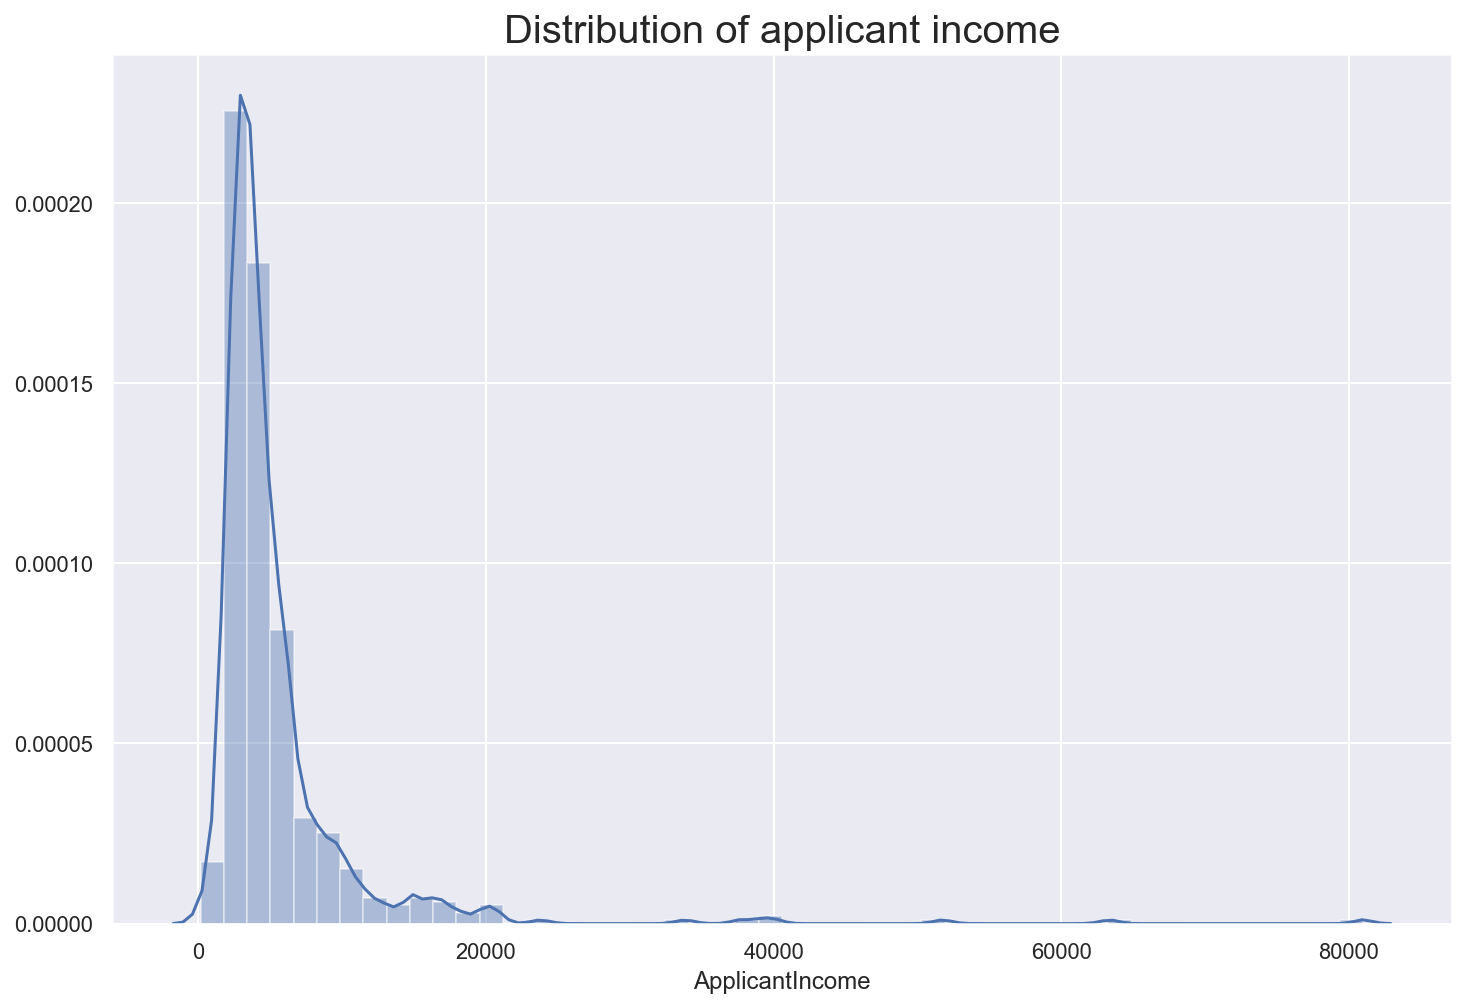

In [54]:
sns.distplot(data.ApplicantIncome);
plt.title('Distribution of applicant income', fontsize=20);

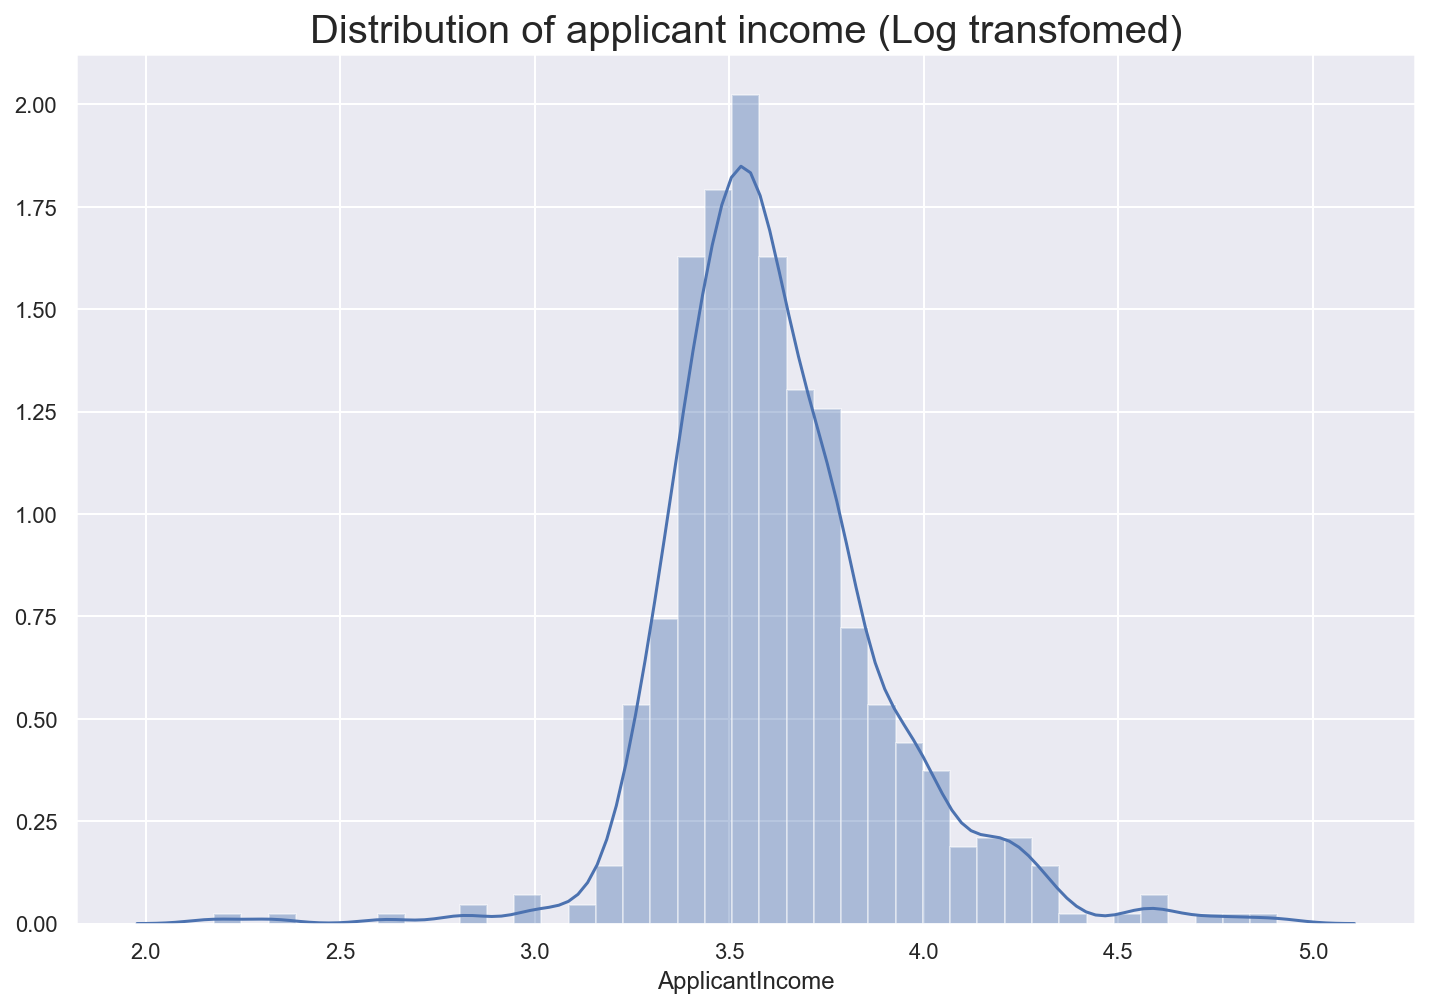

In [58]:
sns.distplot(np.log10(data.ApplicantIncome));
plt.title('Distribution of applicant income (Log transfomed)', fontsize=20);

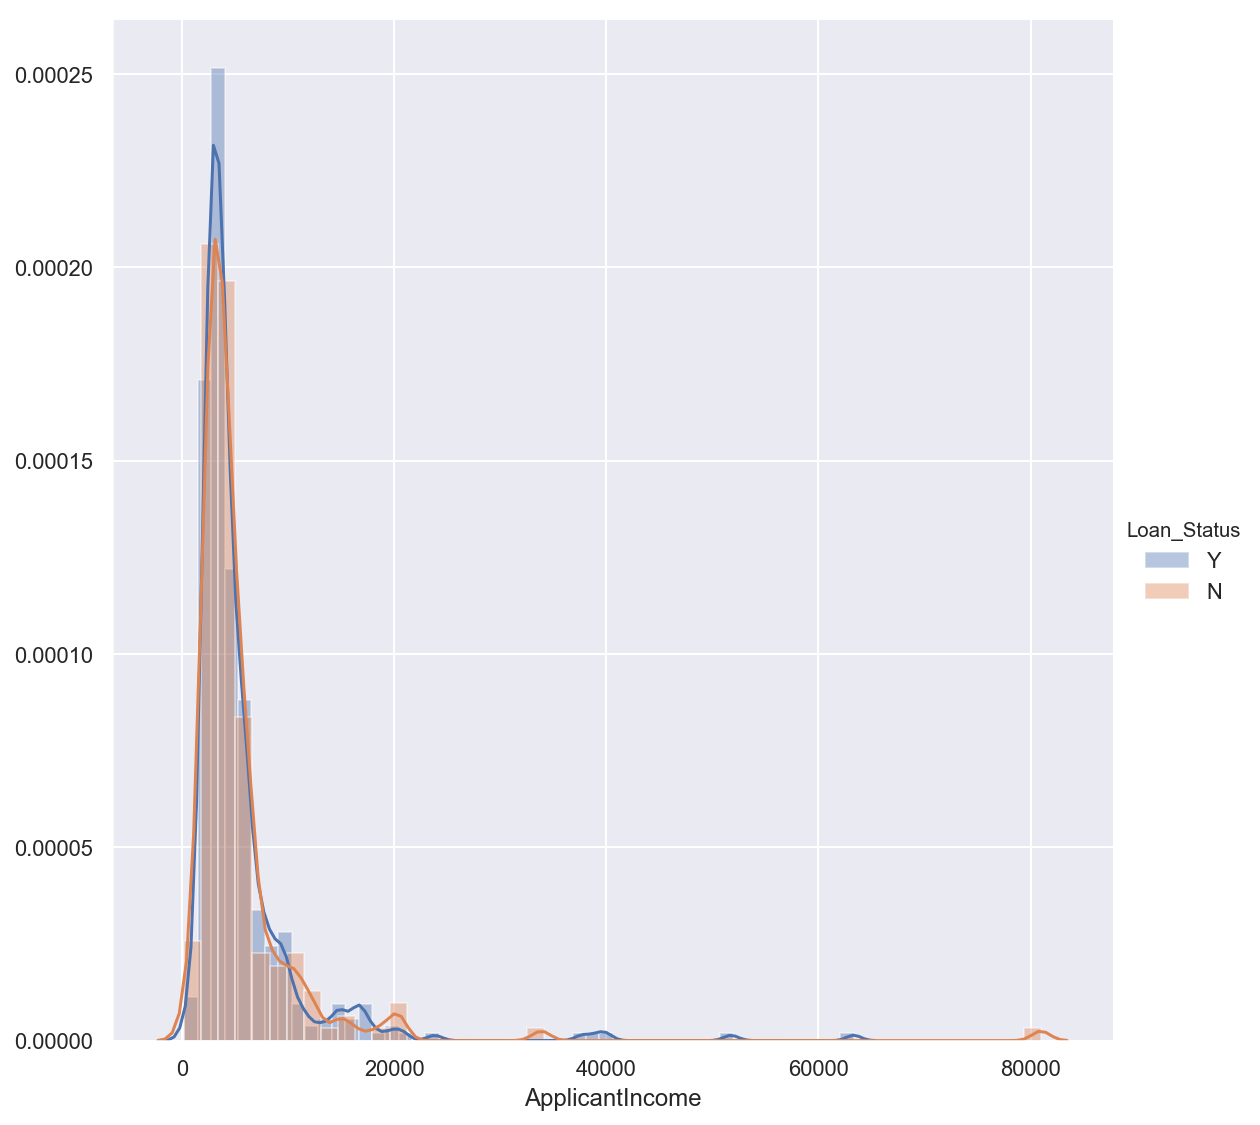

In [49]:
sns.FacetGrid(data, hue='Loan_Status', height=8).map(sns.distplot, 'ApplicantIncome').add_legend();

- Both of the KDEs are overlapping
- ApplicantIncome alone hence can hardly be important

###  `CoapplicantIncome`

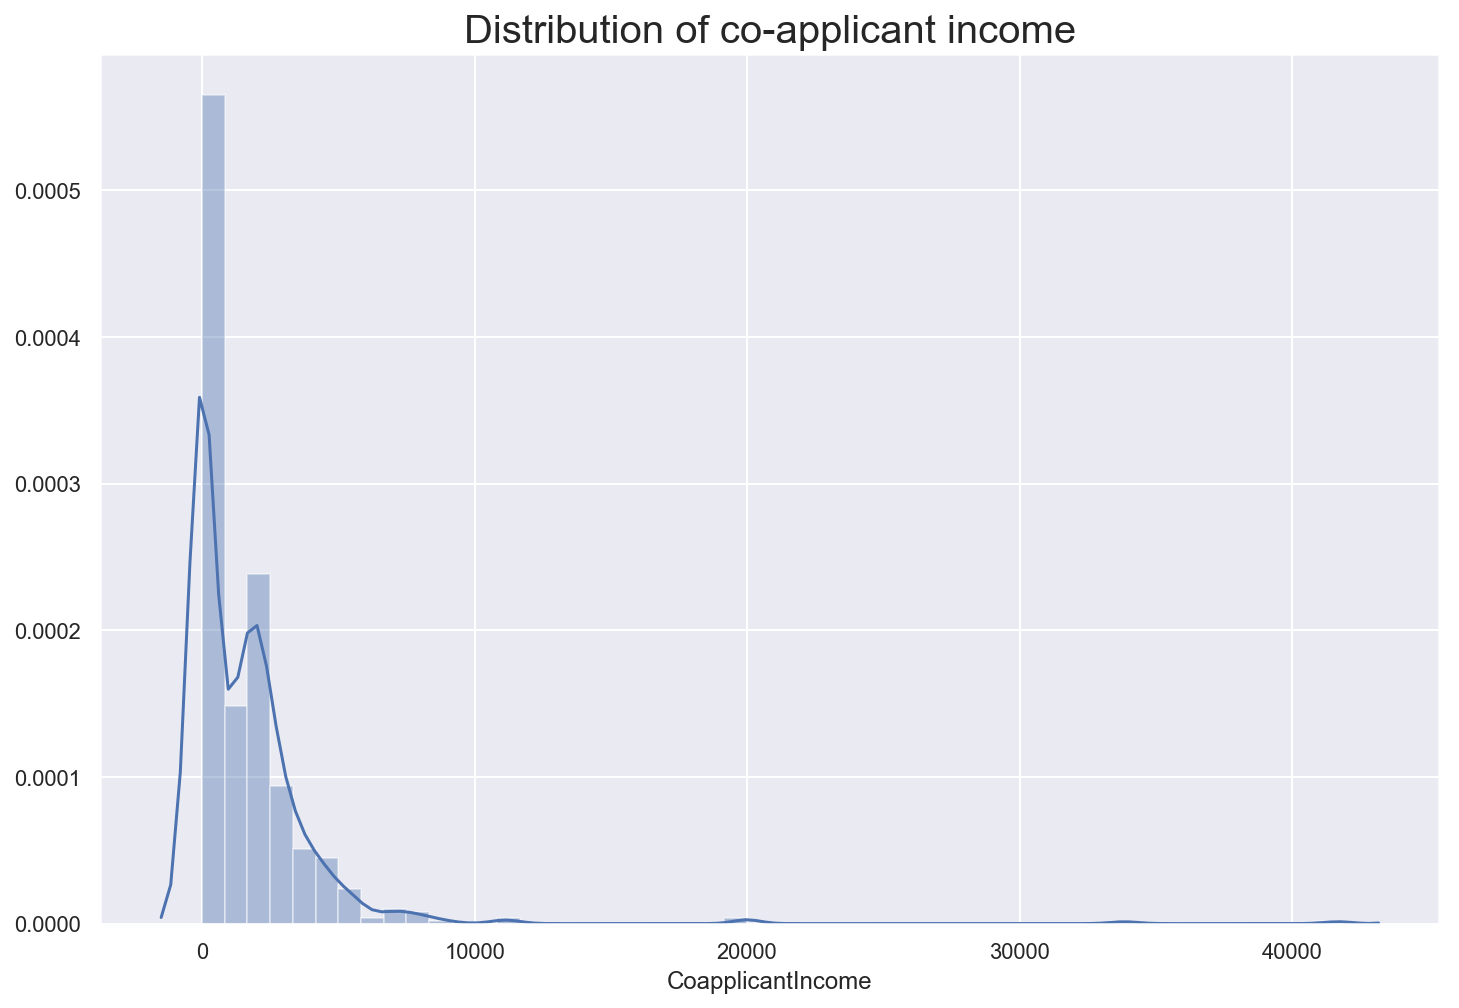

In [59]:
sns.distplot(data.CoapplicantIncome);
plt.title('Distribution of co-applicant income', fontsize=20);

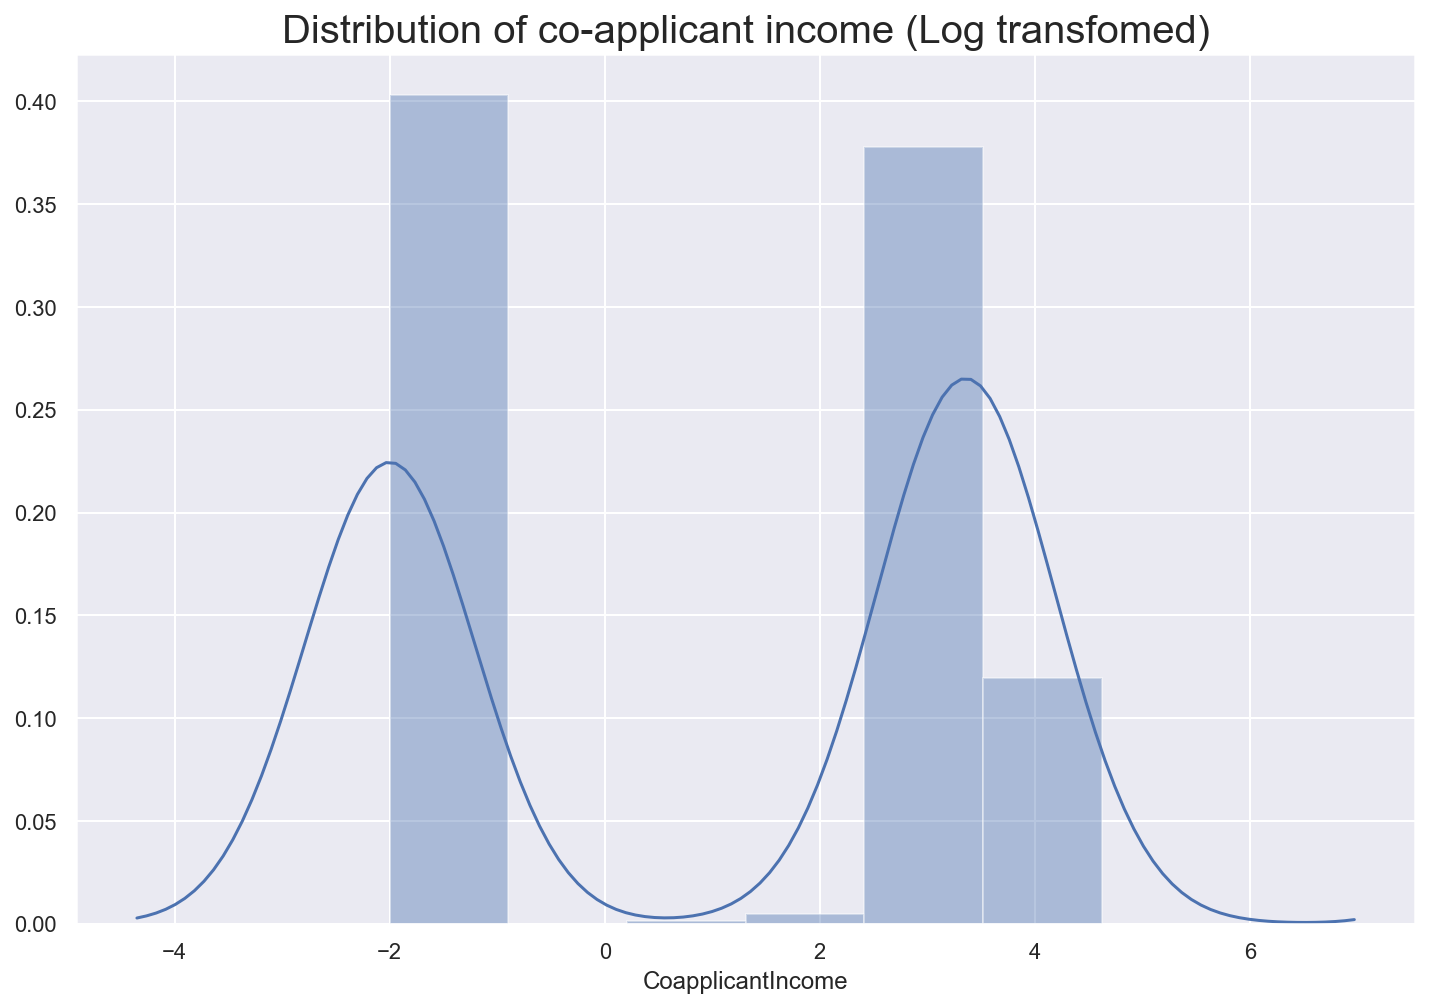

In [65]:
sns.distplot(np.log10(data.CoapplicantIncome+0.01));
plt.title('Distribution of co-applicant income (Log transfomed)', fontsize=20);

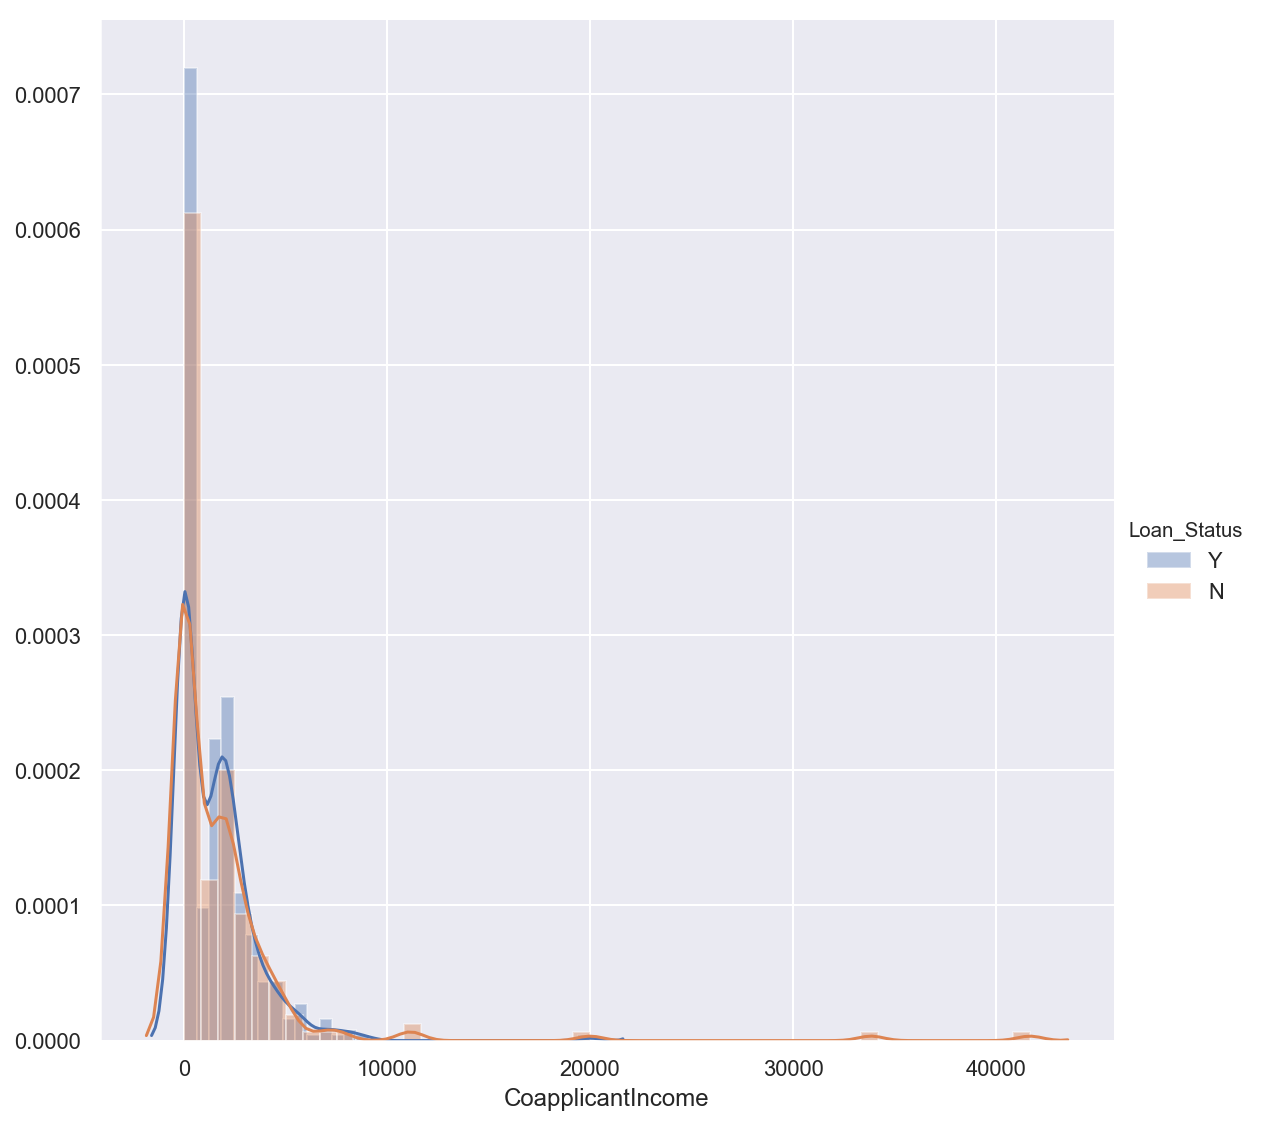

In [74]:
sns.FacetGrid(data, hue='Loan_Status', height=8).map(sns.distplot, 'CoapplicantIncome').add_legend();

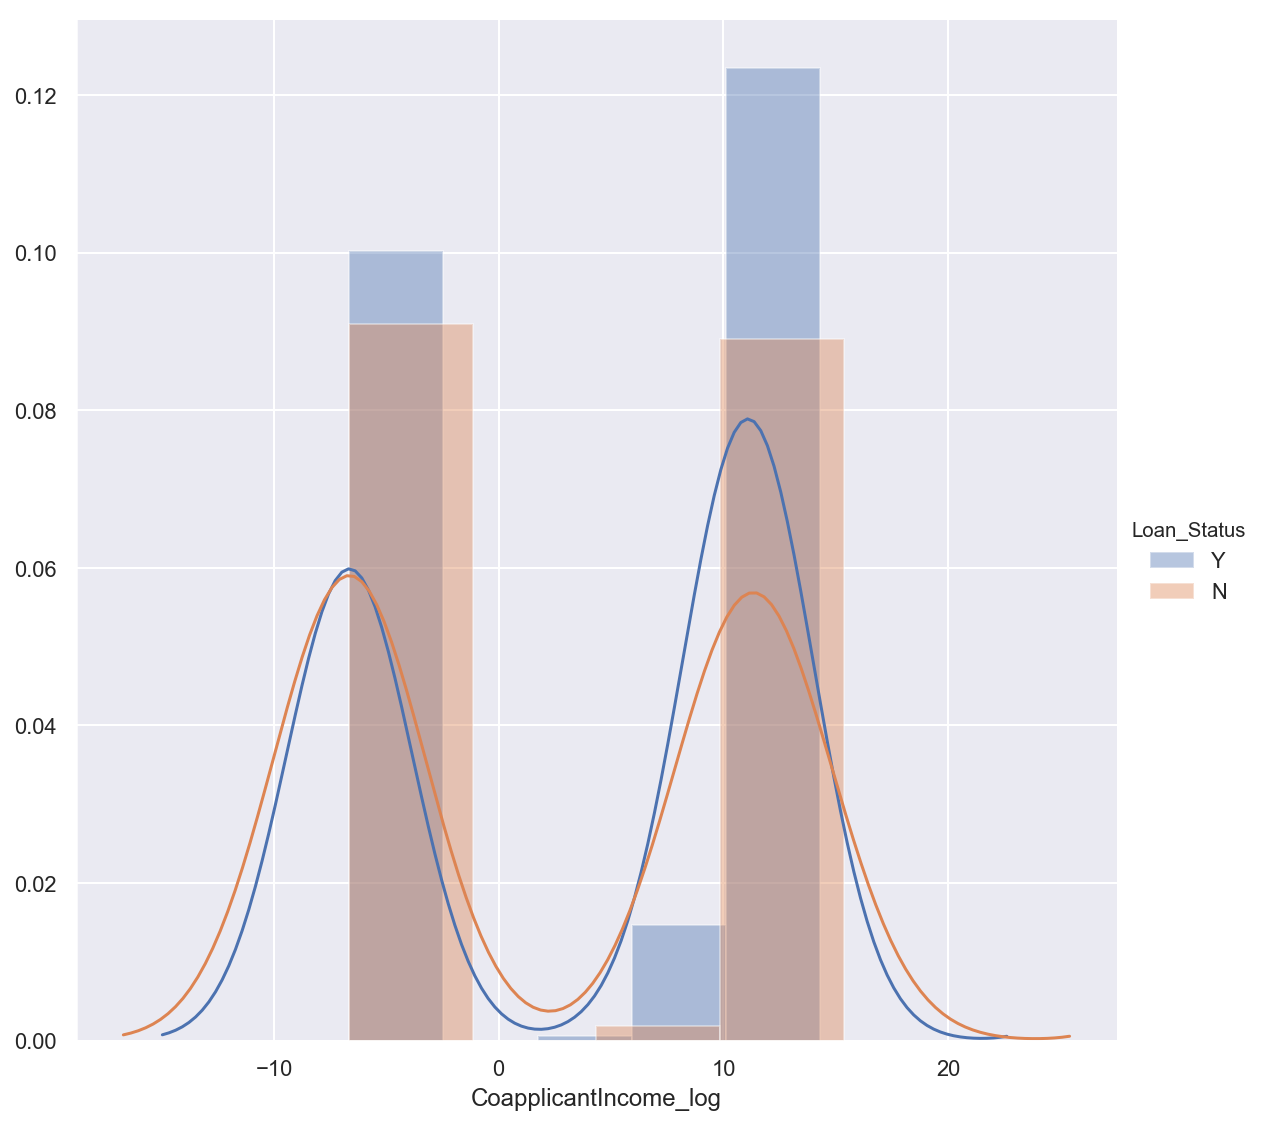

In [73]:
data['CoapplicantIncome_log'] = np.log2(data.CoapplicantIncome + 0.01)
sns.FacetGrid(data, hue='Loan_Status', height=8).map(sns.distplot, 'CoapplicantIncome_log').add_legend();

### `Loan_Amount_Term`

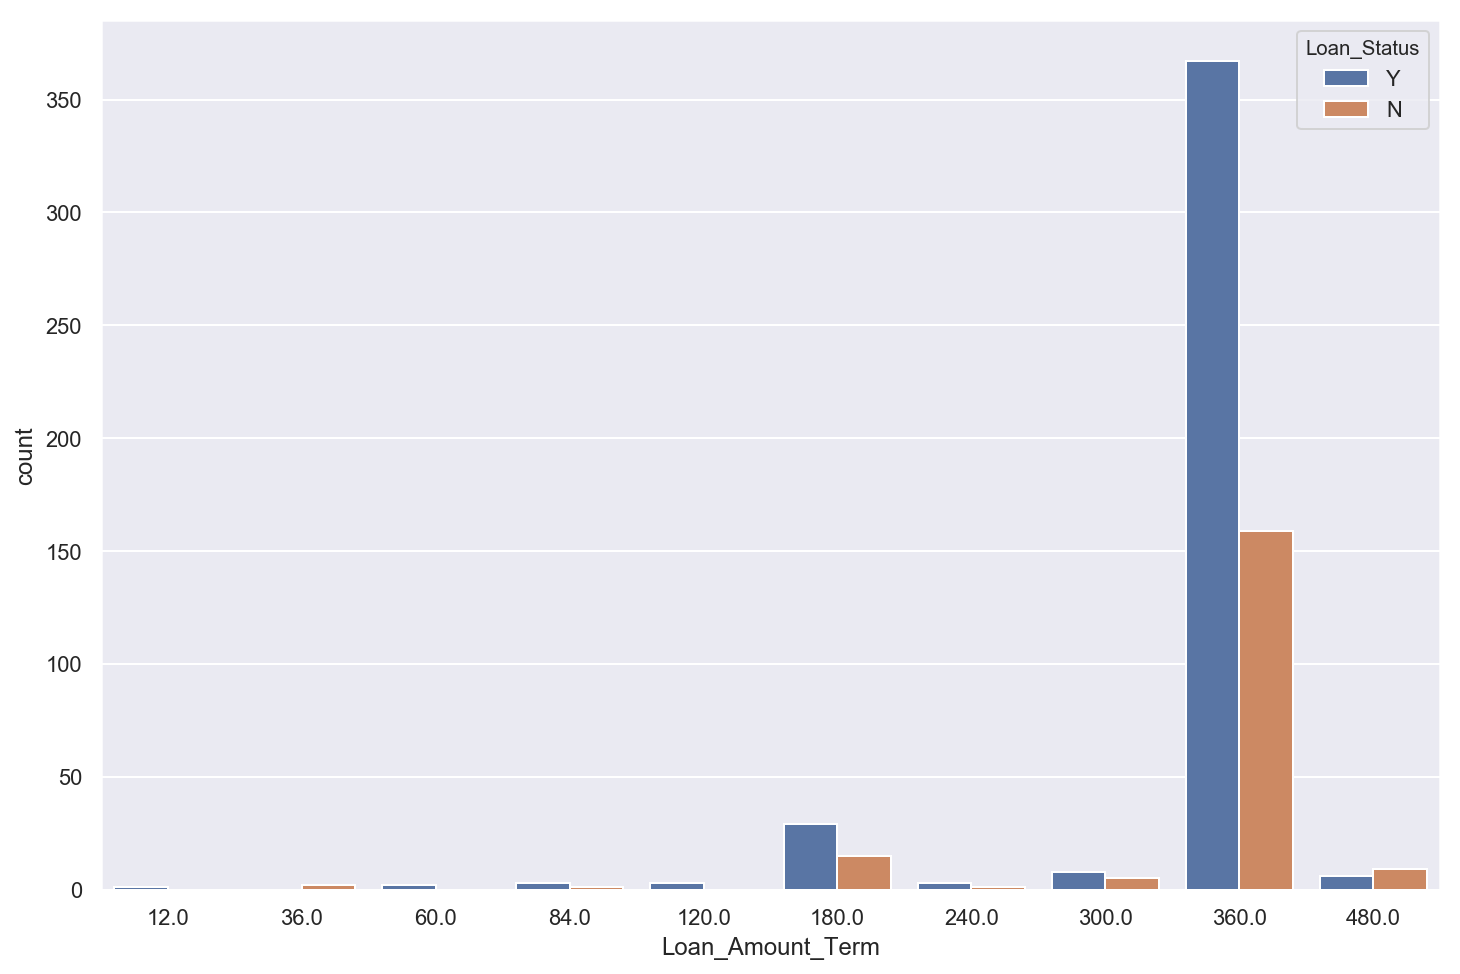

In [75]:
sns.countplot(x="Loan_Amount_Term", hue="Loan_Status", data=data);

### `Self_Employed`

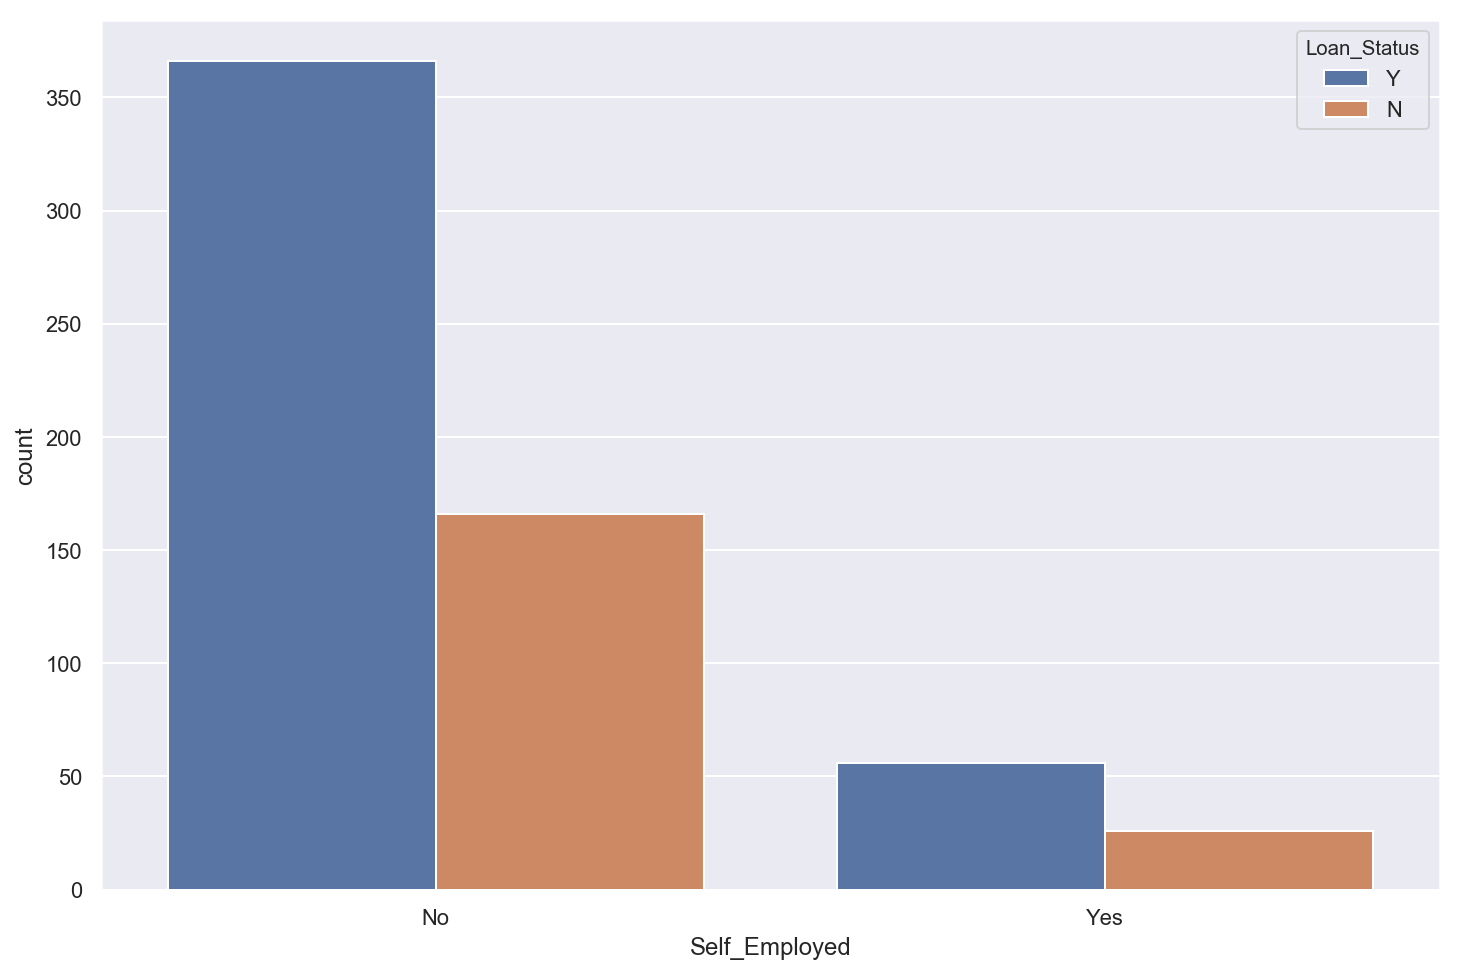

In [76]:
sns.countplot(x="Self_Employed", hue="Loan_Status", data=data);

## Bivarite Analysis

In [80]:
df = data[['ApplicantIncome','CoapplicantIncome', 
           'LoanAmount', 'Loan_Amount_Term', 'Loan_Status']]

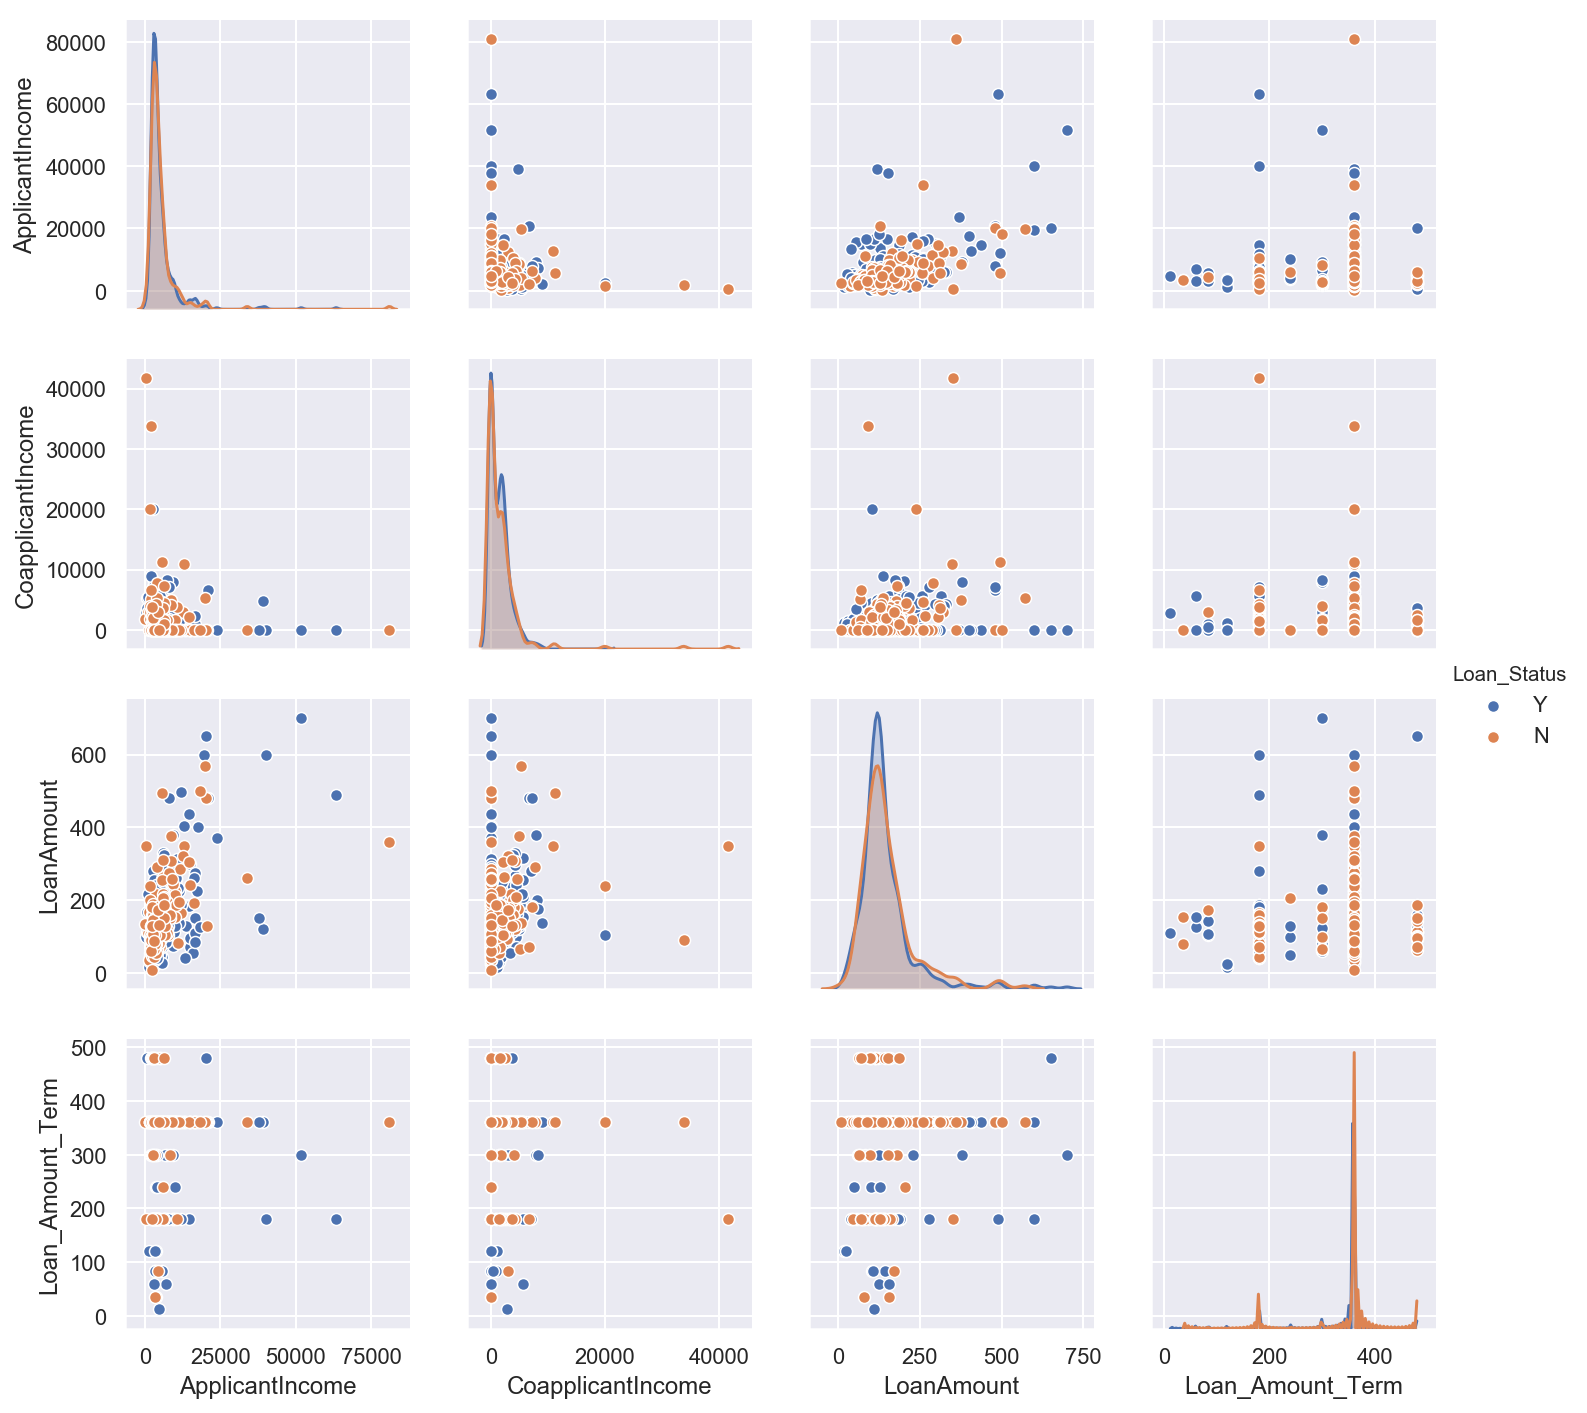

In [82]:
g = sns.pairplot(df, hue="Loan_Status")

- We can see some amount of seperation in `ApplicantIncome` and `CoapplicantIncome`
- Same goes for `ApplicantIncome` and `LoanAmount`

## Preprocssing the variables

In [83]:
data_cat = data[['Gender', 'Married', 
                'Dependents', 'Education',
                'Self_Employed', 'Credit_History',
                'Property_Area']]

In [87]:
ccol = data_cat.columns

In [88]:
cdata = pd.get_dummies(data_cat)

In [93]:
cdata.shape

(614, 16)

In [96]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'CoapplicantIncome_log'],
      dtype='object')

In [97]:
data_num = data[['ApplicantIncome',
                 'CoapplicantIncome',
                 'LoanAmount', 'Loan_Amount_Term']]

In [99]:
data_num['ApplicantIncome'] = np.log(data_num.ApplicantIncome + 0.01)
data_num['CoapplicantIncome'] = np.log(data_num.CoapplicantIncome + 0.01)
data_num['LoanAmount'] = np.log(data_num.LoanAmount + 0.01)

/Users/mayukhsarkar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/mayukhsarkar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/mayukhsarkar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [102]:
ncol = data_num.columns

In [110]:
pdata = pd.concat([cdata, data_num], axis=1, sort=False)

In [111]:
pdata.columns

Index(['Credit_History', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'],
      dtype='object')

## Feature Importances

In [117]:
labels = data.Loan_Status.apply(lambda x: 1 if x == 'Y' else 0)

In [120]:
from sklearn.ensemble import RandomForestClassifier

In [123]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(pdata, labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [124]:
indices = np.argsort(clf.feature_importances_)[::-1]
importances = clf.feature_importances_

In [135]:
cols = ncol.append(pdata.columns)

In [136]:
cols

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'],
      dtype='object')

In [137]:
fimp = pd.DataFrame({"features": cols[indices], "score": importances[indices]})

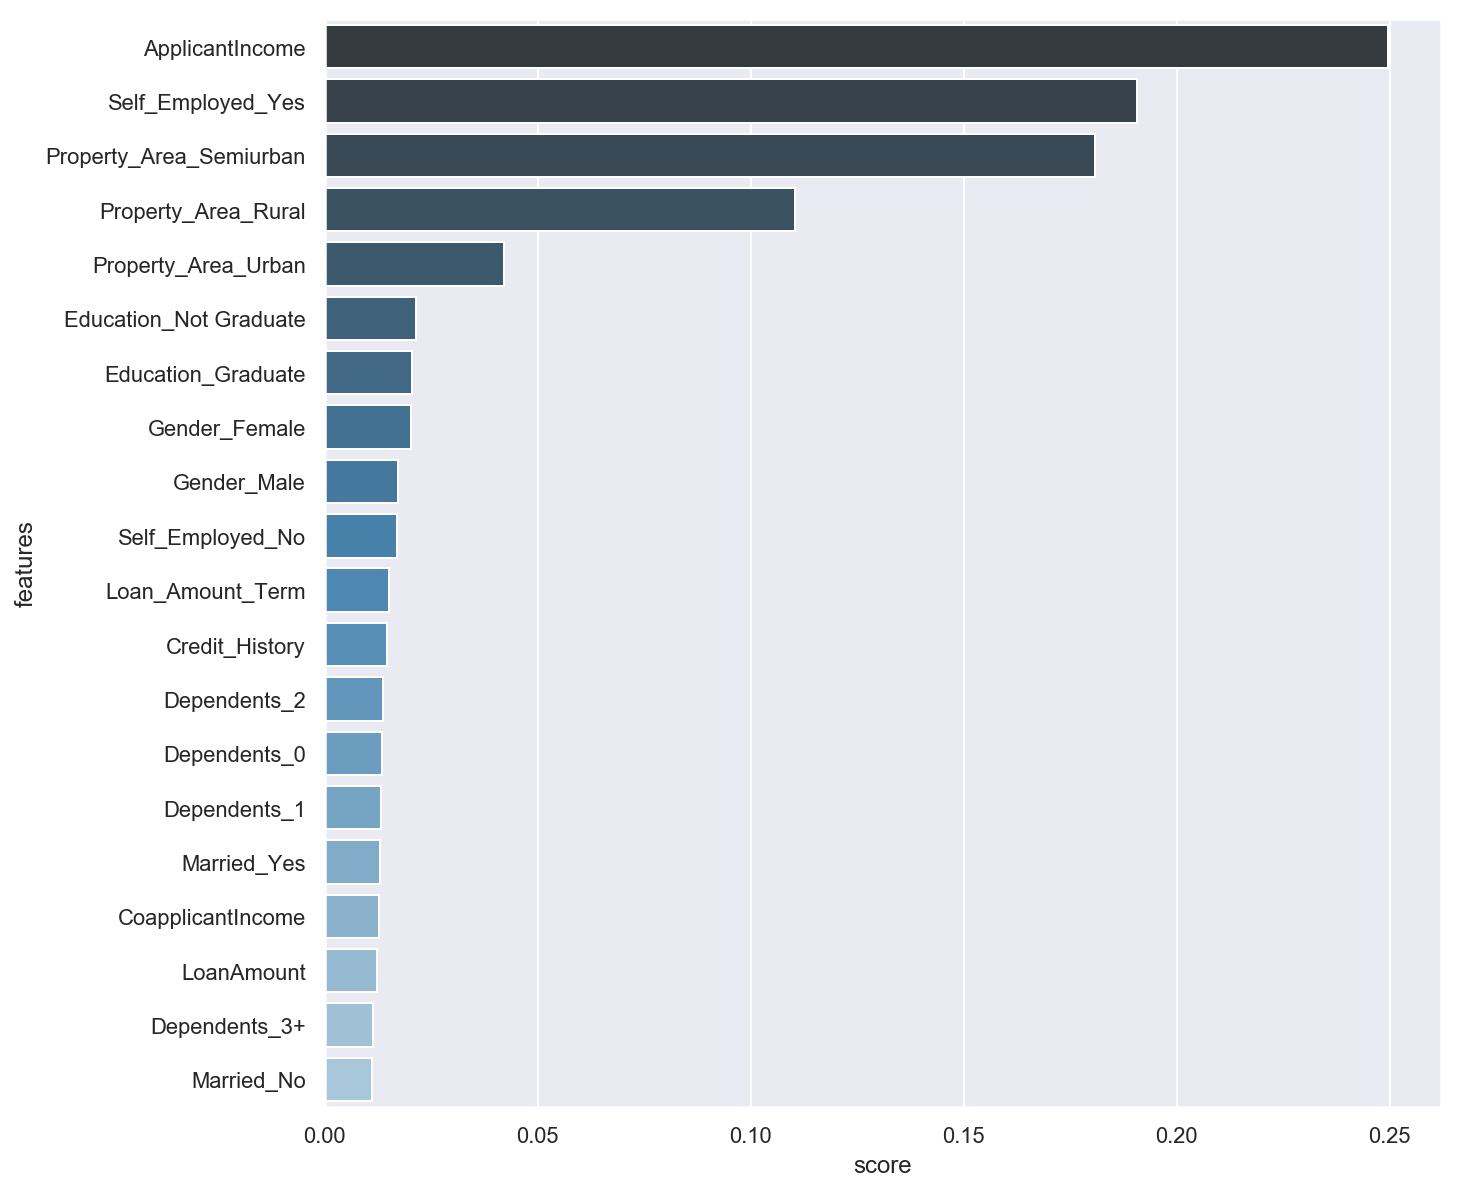

In [138]:
plt.rcParams['figure.figsize'] = [10, 10]
sns.barplot(y='features', x='score', data=fimp, palette='Blues_d');

In [140]:
pdata['label'] = labels
pdata.to_csv('./data/train_clean.csv', index=False)

In [141]:
!ls ./data/

test.csv        train.csv       train_clean.csv


In [142]:
pdata

,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,...,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,label
0,1.0,0,1,1,0,1,0,0,0,1,...,1,0,0,0,1,8.674028,-4.605170,4.852108,360.0,1
1,1.0,0,1,0,1,0,1,0,0,1,...,1,0,1,0,0,8.430111,7.318546,4.852108,360.0,0
2,1.0,0,1,0,1,1,0,0,0,1,...,0,1,0,0,1,8.006371,-4.605170,4.189806,360.0,1
3,1.0,0,1,0,1,1,0,0,0,0,...,1,0,0,0,1,7.856711,7.765573,4.787575,360.0,1
4,1.0,0,1,1,0,1,0,0,0,1,...,1,0,0,0,1,8.699516,-4.605170,4.948831,360.0,1
5,1.0,0,1,0,1,0,0,1,0,1,...,0,1,0,0,1,8.597299,8.341889,5.587286,360.0,1
6,1.0,0,1,0,1,1,0,0,0,0,...,1,0,0,0,1,7.754915,7.323837,4.553982,360.0,1
7,0.0,0,1,0,1,0,0,0,1,1,...,1,0,0,1,0,8.018299,7.825649,5.062658,360.0,0
8,1.0,0,1,0,1,0,0,1,0,1,...,1,0,0,0,1,8.295551,7.330412,5.124024,360.0,1
9,1.0,0,1,0,1,0,1,0,0,1,...,1,0,0,1,0,9.460399,9.302738,5.855101,360.0,0
